In [1]:
# The imports necessary to run the code in this file
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import scipy.stats as stats
import sklearn.linear_model
import sklearn.preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

import wrangle_module
import model

In [2]:
# Acquire, prep, and encode my data from my wrangle module
permits = wrangle_module.acquire_permits()
permits = wrangle_module.prep_permits(permits)
permits = wrangle_module.encode_permits(permits)
permits.shape

(67355, 32)

In [3]:
permits.head()

,API_NO.,Operator_Name_Number,Lease_Name,Well,District,County,Wellbore_Profile,Filing_Purpose,Amend,Total_Depth,...,District_03,District_04,District_05,District_06,District_08,District_09,District_10,District_7B,District_7C,District_8A
Permit_approved,,,,,,,,,,,,,,,,,,,,,
2016-01-04,28531642,"CANTERA OPERATING, LLC (129692)",O. A. LAMPLEY GU 1,1,02,LAVACA,Vertical,Recompletion,N,13606,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,46140267,"PARSLEY ENERGY OPERATIONS, LLC (642652)",RATLIFF 28,1D,7C,UPTON,Vertical,New Drill,N,6000,...,0,0,0,0,0,0,0,0,1,0
2016-01-04,30132834,RKI EXPLORATION & PRODUCTION LLC (714221),CBR 4,6H,08,LOVING,Horizontal,New Drill,N,16000,...,0,0,0,0,1,0,0,0,0,0
2016-01-04,44331348,HENRY RESOURCES LLC (378535),LAUREN,6201,7C,TERRELL,Vertical,Recompletion,N,12500,...,0,0,0,0,0,0,0,0,1,0
2016-01-04,28335696,CABOT OIL & GAS CORPORATION (121700),"SCHORP-WHITE RANCH, LTD. 12H",12H,01,LA SALLE,Horizontal,New Drill,N,8500,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# define my splits from a function i created in the wrangle module
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = \
wrangle_module.split_permits(permits)

In [5]:
# scale the splits from a function in the wrangle module
train_scaled, X_train_scaled, y_train_scaled, validate_scaled, X_validate_scaled, y_validate_scaled, test_scaled, X_test_scaled, y_test_scaled = wrangle_module.scale_permits(train,validate,test)




In [6]:
train.head().T

Permit_approved,2018-11-07,2016-07-11,2016-11-10,2019-09-26,2016-09-26
API_NO.,38937764,46140376,16334012,25536606,17333081
Operator_Name_Number,NOBLE ENERGY INC (611665),APACHE CORPORATION (027200),CABOT OIL & GAS CORPORATION (121700),BPX OPERATING COMPANY (085408),"VERITAS ENERGY, LLC (884589)"
Lease_Name,WILD BILL HICKOK 205-206 UNIT B,CONNELL 48 WEST,THOMPSON RANCH,LONESOME DOVE A,BRYANS 26
Well,9H,2HM,11H,8H,1
District,08,7C,01,02,08
County,REEVES,UPTON,FRIO,KARNES,GLASSCOCK
Wellbore_Profile,Horizontal,Horizontal,Horizontal,Horizontal,Vertical
Filing_Purpose,New Drill,New Drill,New Drill,New Drill,Recompletion
Amend,N,N,N,N,N
Total_Depth,13000,10200,8300,11874,8500


(array([10381.,  8609.,  8832.,  2416.,  2784.,  2222.,   557.,   815.,
          541.,   561.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

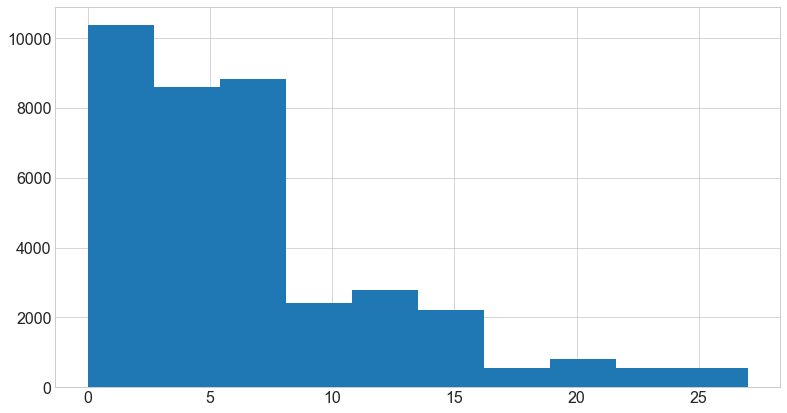

In [7]:
# visualize the distribution of y_train
plt.hist(y_train)

### Baseline

We will use MEAN as the baseline for the MVP 

### Features

Feature engineering will not be part of my modeling due to a lack of continuous features (there is only one; the rest are categorical and are encoded)

### All the X_train/validate/test_kbest/rfe are scaled from X_train/validate/test

In [8]:
# Calculate the mean approval time of the y_train
y_train.Approval_time_days.mean()

6.596399597009386

In [9]:
y_train.head()

,Approval_time_days
Permit_approved,
2018-11-07,0
2016-07-11,3
2016-11-10,8
2019-09-26,2
2016-09-26,13


- The above is the average approval time, i.e. the baseline for modeling

In [10]:
# Create dataframes for modeling purposes from the model module. Just dropping all 
# columns except the scaled depth and the encoded districts and shales
X_train_model, X_validate_model, X_test_model = \
model.create_data_for_models(X_train_scaled, X_validate_scaled, X_test_scaled)

In [11]:
# add baseline prediction to all y_ dataframes
y_train,y_validate,y_test = model.add_pred_mean(y_train,y_validate,y_test)

### USING THE Y_TRAIN ETC (UNSCALED TARGET VARIABLE)

In [13]:
y_train.head()

,Approval_time_days,Approval_time_pred_mean
Permit_approved,,
2018-11-07,0,6.5964
2016-07-11,3,6.5964
2016-11-10,8,6.5964
2019-09-26,2,6.5964
2016-09-26,13,6.5964


In [14]:
# 2. RMSE of tax_value_pred_mean
# Here, I calculate the Root Mean Squared Error of the baseline and print it
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train.Approval_time_days,
                                y_train.Approval_time_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.Approval_time_days, y_validate.Approval_time_pred_mean) ** (0.5)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  5.67 
Validate/Out-of-Sample:  5.6


In [15]:
# Here, I create a DataFrame to insert the evaluation metrics of the different models; this datafram will be 
# taken in by the modeling function below and expanded on.
metric_df = pd.DataFrame(data=[
            {
                'model': 'mean_baseline', 
                'RMSE_train': rmse_train,
                'RMSE_validate': rmse_validate
                }
            ])
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,5.674629,5.595407


In [16]:
# Using the following cell to check on the results for various power and alpha values
# on the tweedie regressor.  

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor

glm = TweedieRegressor(power=1.9, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_model, y_train.Approval_time_days)

# predict train
y_train['Approval_time_pred_glm'] = glm.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Approval_time_days, y_train.Approval_time_pred_glm) ** (1/2)

# predict validate
y_validate['Approval_time_pred_glm'] = glm.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Approval_time_days, y_validate.Approval_time_pred_glm) ** (1/2)


print(f'RMSE_train: {rmse_train}')
print(f'RMSE_validate: {rmse_validate}')

RMSE_train: 5.66093211391064
RMSE_validate: 5.585342543322206


In [17]:
# assigning and displaying the evaluation df for the various models i've run
# in my model module
metric_df = model.run_all_models(X_train_model, y_train, X_validate_model, y_validate, X_test_model, metric_df)
metric_df

,model,RMSE_train,RMSE_validate
0,mean_baseline,5.674629,5.595407
1,OLS Regressor,5.661146,5.586228
2,Lasso_alpha1,5.674629,5.595407
3,glm_compound,5.660915,5.585307
4,quadratic_deg2,5.652545,5.578995
5,quadratic_deg3,5.649677,5.574972


- the third degree polynomial regression is returning the best result, and will be the model used on the test dataset

## Model evaluation

In [ ]:
def create_polynomial_features_deg3(df):
    '''
    function to create polynomial features for running model on test
    '''
    # import from sklearn to create polynomial features for running the model on test
    from sklearn.preprocessing import PolynomialFeatures

    # Make the polynomial features to get a new set of features. import from sklearn
    pf = PolynomialFeatures(degree=3)

    # Fit and transform X_train_model (which is scaled)
    X_train_degree3 = pf.fit_transform(X_train_model)

    # Transform X_validate_model & X_test_model
    X_validate_degree3 = pf.transform(X_validate_model)
    X_test_degree3 =  pf.transform(X_test_model)

In [18]:
# import from sklearn to create polynomial features for running the model on test
from sklearn.preprocessing import PolynomialFeatures

# Make the polynomial features to get a new set of features. import from sklearn
pf = PolynomialFeatures(degree=3)

# Fit and transform X_train_model (which is scaled)
X_train_degree3 = pf.fit_transform(X_train_model)

# Transform X_validate_model & X_test_model
X_validate_degree3 = pf.transform(X_validate_model)
X_test_degree3 =  pf.transform(X_test_model)

In [19]:
# Create the model object
lm2 = LinearRegression()

# Fit the model to our test data. 
lm2.fit(X_test_degree3, y_test.Approval_time_days)

# Create a column in the y_test dataframe to hold the polynomial regression prediction:
y_test['Approval_time_pred_lm2'] = lm2.predict(X_test_degree3)

# Evaluate by calculating its RMSE on test
rmse_test = mean_squared_error(y_test.Approval_time_days, y_test.Approval_time_pred_lm2) ** (1/2)
# A statement reminding us of the RMSE on the train and validate samples:
print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", metric_df.RMSE_train.iloc[5], 
      "\nValidation/Out-of-Sample: ", metric_df.RMSE_validate.iloc[5],)

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  5.649676665982054 
Validation/Out-of-Sample:  5.574971850381146


In [20]:
# And a statement on the RMSE of the third degree polynomial model
print("RMSE for Polynomial Model, degrees=3\nTest/Out of Sample: ", rmse_test)

RMSE for Polynomial Model, degrees=3
Test/Out of Sample:  5.639662829073366


In [21]:
# A simple calculation of the percent improvement over baseline:
(5.674630 - 5.639662) / 5.674630

0.006162163876763635

### Which is to say: the best model has beat baseline by 0.6 % (that's 6 tenths of one percent)

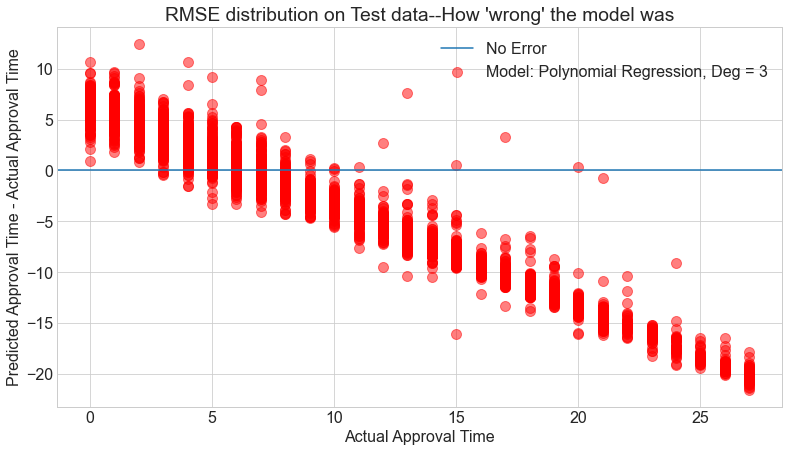

In [22]:
# A matplotlib scatterplot showing the residual error between predicted RMSE and actual tax value

# create a line representing no error
plt.axhline(label="No Error")
# plot approval times vs predicted approval times, with color and transparency defined
plt.scatter(y_test.Approval_time_days, y_test.Approval_time_pred_lm2 - y_test.Approval_time_days,\
            alpha=.5, color="red", s=100, label="Model: Polynomial Regression, Deg = 3")
# assign a legend
plt.legend()
# label the axes
plt.xlabel("Actual Approval Time")
plt.ylabel("Predicted Approval Time - Actual Approval Time")
# give the chart a title
plt.title("RMSE distribution on Test data--How 'wrong' the model was")
plt.show()